# Precisa conferir as contas, não estão batendo (Fluxo de caixa)

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Lendo a planilha com os dados limpos

In [2]:
dfs_file = pd.ExcelFile("Planilhas/Direcional/DFs-Direcional-Limpo.xlsx", engine="openpyxl")

BP = pd.read_excel(dfs_file, "BP")
DFC = pd.read_excel(dfs_file, "DFC")
DRE = pd.read_excel(dfs_file, "DRE")
COTACOES = pd.read_excel(dfs_file, "Ações")

In [3]:
BP.dropna(how='all', axis='columns', inplace=True); 
DFC.dropna(how='all', axis='columns', inplace=True); 
DRE.dropna(how='all', axis='columns', inplace=True); 
COTACOES.dropna(how='all', axis='columns', inplace=True); # ; supress output

## Função para encontrar células nos DataFrames com base em DF, nome da conta e ano

In [4]:
def getValue(df, nome_coluna_principal, ano, coluna_principal="Direcional ON"):
    return df[df[coluna_principal] == nome_coluna_principal][ano].values[0]

## Indicadores de Solvência de Curto Prazo

$Liquidez \; Corrente = \frac{Ativo \; Circulante}{Passivo \; Circulante}$

$Liquidez \; Seca = \frac{Ativo \; Circulante \; - \; Estoque}{Passivo \; Circulante}$

$Liquidez \; Imediata = \frac{Caixa}{Passivo \; Circulante}$

In [5]:
years = [2017, 2018, 2019, 2020]

liquidezCorrente = []
liquidezSeca = []
liquidezImediata = []

for i in years:
    ativoCirculante = getValue(BP, 'Ativo Circulante', i)
    passivoCirculante = getValue(BP, 'Passivo Circulante', i)
    estoquesCP = getValue(BP, 'Estoques CP', i)
    caixa = getValue(BP, 'Caixa e Equivalentes', i)
    
    liquidezCorrente_ = ativoCirculante / passivoCirculante
    liquidezSeca_ = (ativoCirculante - estoquesCP) / passivoCirculante
    liquidezImediata_ = caixa / passivoCirculante
    
    liquidezCorrente.append(liquidezCorrente_)
    liquidezSeca.append(liquidezSeca_)
    liquidezImediata.append(liquidezImediata_)

solvenciaCP = pd.DataFrame()   

solvenciaCP["Ano"] = years
solvenciaCP["Liquidez Corrente"] = liquidezCorrente
solvenciaCP["Liquidez Seca"] = liquidezSeca
solvenciaCP["Liquidez Imediata"] = liquidezImediata
    
solvenciaCP.set_index("Ano", inplace=True)
solvenciaCP

,Liquidez Corrente,Liquidez Seca,Liquidez Imediata
Ano,,,
2017,3.350606,1.966682,0.588563
2018,2.945875,1.868658,0.936055
2019,4.517204,2.425165,1.033357
2020,4.660344,2.443732,1.278672


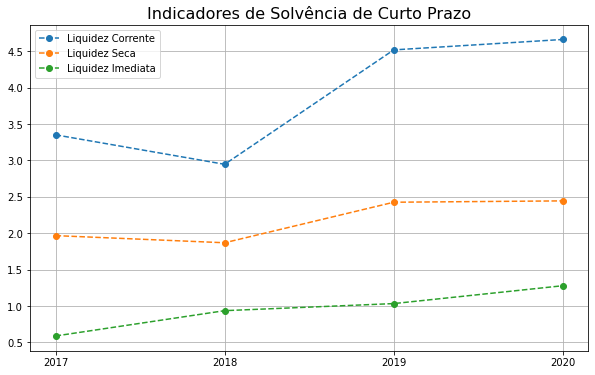

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(years, liquidezCorrente, 'o--', label="Liquidez Corrente")
plt.plot(years, liquidezSeca, 'o--', label="Liquidez Seca")
plt.plot(years, liquidezImediata, 'o--', label="Liquidez Imediata")
plt.xticks(years)
plt.title("Indicadores de Solvência de Curto Prazo", size=16)
plt.grid(True)
plt.legend()
plt.show()

## Indicadores de Solvência de Longo Prazo

$Endividamento \; Total = \frac{Passivo \; Total}{Ativo \; Total}$

$Índice \; Dívida/Capital \; Próprio = \frac{Passivo \; Financeiro}{Patrimônio \; Líquido}$

$Multiplicador \; do \; PL = \frac{Ativo \; Total}{Patrimônio \; Líquido}$

$Índice \; de \; Cobertura \; de \; Juros = \frac{LAJIR}{Juros}$

$Índice \; de \; Cobertura \; de \; Caixa = \frac{LAJIDA}{Juros}$

$Índice \; de \; Endividamento/LAJIDA = \frac{Passivo \; Total}{LAJIDA}$

In [7]:
years = [2017, 2018, 2019, 2020]

endividamentoTotal = []
dividaPorCapitalProprio = []
multPatrimonioLiq = []
coberturaJuros = []
coberturaCaixa = []
endividamentoLAJIDA = []

for i in years:
    ativoTotal = getValue(BP, 'Ativo Total', i)
    passivoTotal = getValue(BP, 'Passivo Total', i)
    patrimonioLiquido = getValue(BP, 'Patrimônio Líquido Consolidado', i)
    financiamentoCP = getValue(BP, 'Financiamento CP', i)
    financiamentoLP = getValue(BP, 'Financiamento LP', i)
    debenturesCP = getValue(BP, 'Debêntures CP', i)
    debenturesLP = getValue(BP, 'Debêntures LP', i)
    dividaTotal = financiamentoCP + financiamentoLP + debenturesCP + debenturesLP
    lajir = getValue(DRE, '(=) LAJIR', i)
    lajida = lajir + getValue(DFC, 'Depreciação, Amortização e Exaustão', i)
    juros = getValue(DRE, '(-) Despesas Financeiras', i)
    
    endividamentoTotal_ = passivoTotal / ativoTotal
    dividaPorCapitalProprio_ = dividaTotal / patrimonioLiquido
    multPatrimonioLiq_ = ativoTotal / patrimonioLiquido
    coberturaJuros_ = lajir / juros
    coberturaCaixa_ = lajida / juros
    endividamentoLajida_ = passivoTotal / lajida
    
    endividamentoTotal.append(endividamentoTotal_)
    dividaPorCapitalProprio.append(dividaPorCapitalProprio_)
    multPatrimonioLiq.append(multPatrimonioLiq_)
    coberturaJuros.append(coberturaJuros_)
    coberturaCaixa.append(coberturaCaixa_)
    endividamentoLAJIDA.append(endividamentoLajida_)

solvenciaLP = pd.DataFrame()

solvenciaLP["Ano"] = years
solvenciaLP["Endividamento Total"] = endividamentoTotal
solvenciaLP["Dívida/Capital Próprio"] = dividaPorCapitalProprio
solvenciaLP["Multiplicador do PL"] = multPatrimonioLiq
solvenciaLP["Cobertura de Juros"] = coberturaJuros
solvenciaLP["Cobertura de Caixa"] = coberturaCaixa
solvenciaLP["Endividamento LAJIDA"] = endividamentoLAJIDA

solvenciaLP.set_index("Ano", inplace=True)
solvenciaLP

,Endividamento Total,Dívida/Capital Próprio,Multiplicador do PL,Cobertura de Juros,Cobertura de Caixa,Endividamento LAJIDA
Ano,,,,,,
2017,0.612649,0.557217,2.581640,-3.066887,-2.531374,-23.312714
2018,0.700479,0.716005,3.338667,-0.523582,-0.181488,-305.037353
2019,0.705816,0.637532,3.399231,-4.714516,-5.590704,14.353560
2020,0.737328,0.799056,3.807027,-5.017749,-5.957204,14.312392


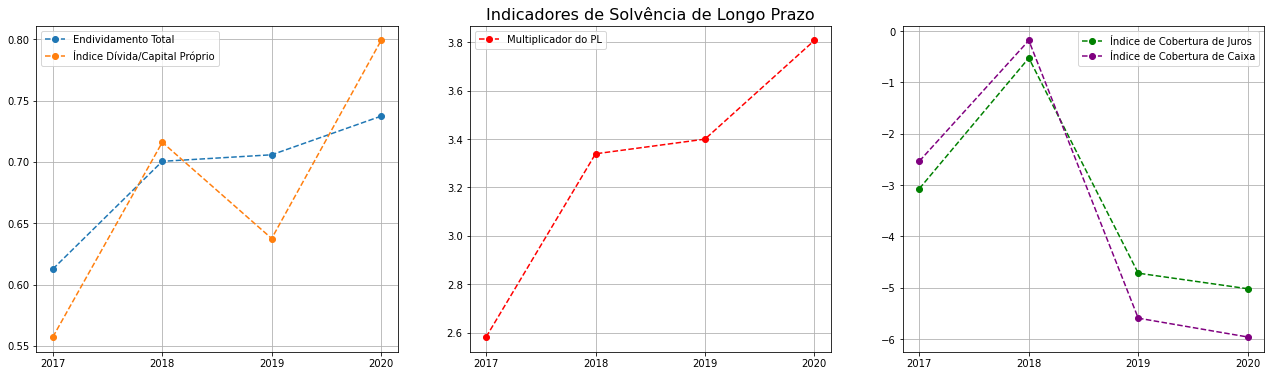

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
ax1.plot(years, endividamentoTotal, 'o--', label="Endividamento Total")
ax1.plot(years, dividaPorCapitalProprio, 'o--', label="Índice Dívida/Capital Próprio")
ax1.set_xticks(years)
ax1.grid(True)
ax1.legend()
ax2.plot(years, multPatrimonioLiq, 'o--', label="Multiplicador do PL", color="red")
ax2.set_title("Indicadores de Solvência de Longo Prazo", size=16)
ax2.set_xticks(years)
ax2.grid(True)
ax2.legend()
ax3.plot(years, coberturaJuros, 'o--', label="Índice de Cobertura de Juros", color="green")
ax3.plot(years, coberturaCaixa, 'o--', label="Índice de Cobertura de Caixa", color="purple")
ax3.set_xticks(years)
ax3.grid(True)
ax3.legend()
plt.show()

## Indicadores de Gestão de Ativos ou de Giro

$Giro \; do \; Estoque = \frac{Custo \; dos \; Produtos \; Vendidos}{Estoque}$

$Prazo \; Médio \; de \; Estocagem \; (PME) = \frac{365 \; dias}{Giro \; do \; Estoque}$

$Giro \; de \; Contas \; a \; Receber = \frac{Vendas}{Contas \; a \; Receber}$

$Prazo \; Médio \; de \; Recebimento \; (PMR) = \frac{365 \; dias}{Giro \; de \; Contas \; a \; Receber}$

$Giro \; do \; Ativo \; Total = \frac{Vendas}{Ativo \; Total}$


In [9]:
years = [2017, 2018, 2019, 2020]

giroEstoque = []
PME = []
giroContasAReceber = []
PMR = []
giroAtivoTotal = []

for i in years:
    CMV = getValue(DRE, '(-) Custo dos Produtos Vendidos', i)
    estoque = getValue(BP, 'Estoques CP', i)
    
    giroEstoque_ = CMV / estoque
    PME_ = 365 / giroEstoque_
    
    vendas = getValue(DRE, '(+) Receita Líquida Operacional', i)
    contasAReceber = getValue(BP, 'Contas a Receber CP', i)
    giroContasAReceber_ = vendas / contasAReceber
    
    PMR_ = 365/giroContasAReceber_
    
    ativoTotal = getValue(BP, 'Ativo Total', i)
    giroAtivoTotal_ = vendas / ativoTotal
    
    giroEstoque.append(giroEstoque_)
    PME.append(PME_)
    giroContasAReceber.append(giroContasAReceber_)
    PMR.append(PMR_)
    giroAtivoTotal.append(giroAtivoTotal_)

gestaoAtivos = pd.DataFrame()

gestaoAtivos["Ano"] = years
gestaoAtivos["Giro do Estoque"] = giroEstoque
gestaoAtivos["PME"] = PME
gestaoAtivos["Giro de Contas a Receber"] = giroContasAReceber
gestaoAtivos["PMR"] = PMR
gestaoAtivos["Giro do Ativo Total"] = giroAtivoTotal

gestaoAtivos.set_index("Ano", inplace=True)    
gestaoAtivos 

,Giro do Estoque,PME,Giro de Contas a Receber,PMR,Giro do Ativo Total
Ano,,,,,
2017,0.735565,496.217275,1.069575,341.256895,0.181531
2018,1.031660,353.798887,2.952454,123.625983,0.250672
2019,0.894917,407.858945,4.195881,86.990080,0.313280
2020,0.771296,473.229343,6.082771,60.005547,0.294178


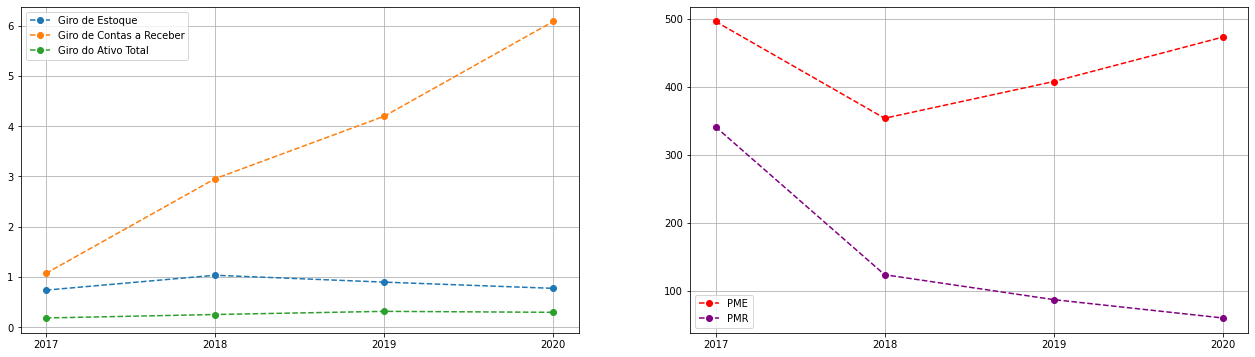

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax1.plot(years, giroEstoque, 'o--', label="Giro de Estoque")
ax1.plot(years, giroContasAReceber, 'o--', label="Giro de Contas a Receber")
ax1.plot(years, giroAtivoTotal, 'o--', label="Giro do Ativo Total")
ax1.set_xticks(years)
ax1.grid(True)
ax1.legend()
ax2.plot(years, PME, 'o--', label="PME", color="red")
ax2.plot(years, PMR, 'o--', label="PMR", color="purple")
ax2.set_xticks(years)
ax2.grid(True)
ax2.legend()
plt.show()

## Medidas de Lucratividade

$Margem \; Bruta = \frac{Lucro \; Bruto}{Vendas}$

$Margem \; LAJIDA = \frac{LAJIDA}{Vendas}$

$Margem \; Líquida = \frac{Lucro \; Líquido}{Vendas}$

$Retorno \; sobre \; o \; Ativo \; (ROA) = \frac{Lucro \; Líquido}{Ativo \; Total}$

$Retorno \; sobre \; o \; PL \; (ROE) = \frac{Lucro \; Líquido}{Patrimônio \; Líquido}$

In [11]:
years = [2017, 2018, 2019, 2020]

margemBruta = []
margemLAJIDA = []
margemLiquida = []
ROA = []
ROE = []

for i in years:
    
    vendas = getValue(DRE, '(+) Receita Líquida Operacional', i)
    lucroBruto = getValue(DRE, '(=) Lucro Bruto', i)
    
    margemBruta_ = lucroBruto / vendas
    
    lajir = getValue(DRE, '(=) LAJIR', i)
    lajida = getValue(DFC, 'Depreciação, Amortização e Exaustão', i) + lajir
    
    margemLAJIDA_ = lajida / vendas
    
    lucroLiquido = getValue(DRE, '(=) Lucro Líquido', i)
    
    margemLiquida_ = lucroLiquido / vendas
    
    ativoTotal = getValue(BP, 'Ativo Total', i)
    ROA_ = lucroLiquido / ativoTotal
    
    patrimonioLiquido = getValue(BP, 'Patrimônio Líquido Consolidado', i)
    ROE_ = lucroLiquido / patrimonioLiquido
    
    margemBruta.append(margemBruta_)
    margemLAJIDA.append(margemLAJIDA_)
    margemLiquida.append(margemLiquida_)
    ROA.append(ROA_)
    ROE.append(ROE_)

lucratividade = pd.DataFrame()

lucratividade["Ano"] = years
lucratividade["Margem Bruta"] = margemBruta
lucratividade["Margem LAJIDA"] = margemLAJIDA
lucratividade["Margem Líquida"] = margemLiquida
lucratividade["ROA"] = ROA
lucratividade["ROE"] = ROE

lucratividade.set_index("Ano", inplace=True)
lucratividade

,Margem Bruta,Margem LAJIDA,Margem Líquida,ROA,ROE
Ano,,,,,
2017,0.049821,-0.144767,-0.182794,-0.033183,-0.085666
2018,0.271707,-0.009161,-0.063407,-0.015894,-0.053066
2019,0.336790,0.156964,0.082851,0.025956,0.088229
2020,0.348211,0.175121,0.100040,0.029430,0.112040


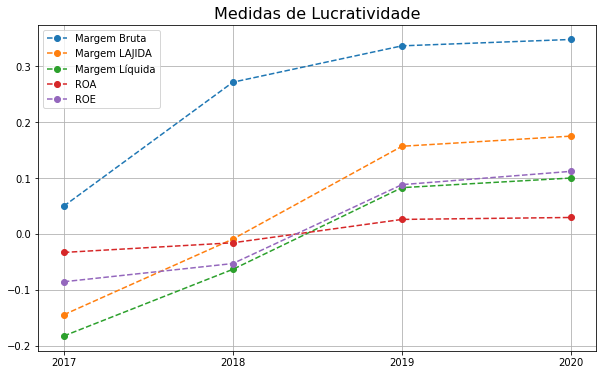

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(years, margemBruta, 'o--', label="Margem Bruta")
plt.plot(years, margemLAJIDA, 'o--', label="Margem LAJIDA")
plt.plot(years, margemLiquida, 'o--', label="Margem Líquida")
plt.plot(years, ROA, 'o--', label="ROA")
plt.plot(years, ROE, 'o--', label="ROE")
plt.xticks(years)
plt.title("Medidas de Lucratividade", size=16)
plt.grid(True)
plt.legend()
plt.show()

## Medidas de Valor de Mercado

$Índice \; Preço/Lucro = \frac{Preço \; por \; Ação}{Lucro \; por \; Ação}$

$Índice \; Valor \; de \; Mercado/Valor \; Contábil = \frac{Valor \; de \; Mercado \; por \; Ação}{Valor \; Contábil \; por \; Ação}$

In [13]:
years = [2017, 2018, 2019, 2020]

precoLucro = []
mercadoContabil = []


for i in years:
    
    precoPorAcao = getValue(COTACOES, 'Preço por Ação (Fechamento do Ano)', i)
    lucroLiquido = getValue(DRE, '(=) Lucro Líquido', i)
    quantidadeAcoes = getValue(COTACOES, 'Quantidade de Ações', i)

    lucroPorAcao = lucroLiquido / quantidadeAcoes

    precoLucro_ = precoPorAcao / lucroPorAcao
    
    valorMercado = precoPorAcao * quantidadeAcoes
    
    bookValue = getValue(BP, "Patrimônio Líquido Consolidado", i)

    mercadoContabil_ = valorMercado / bookValue

    precoLucro.append(precoLucro_)
    mercadoContabil.append(mercadoContabil_)

mercado = pd.DataFrame()

mercado["Ano"] = years
mercado["P/E"] = precoLucro
mercado["Valor de Mercado / Valor Contábil"] = mercadoContabil

mercado.set_index("Ano", inplace=True)
mercado

,P/E,Valor de Mercado / Valor Contábil
Ano,,
2017,-4.780341,0.409512
2018,-13.009966,0.690391
2019,17.357180,1.531409
2020,12.791178,1.433120


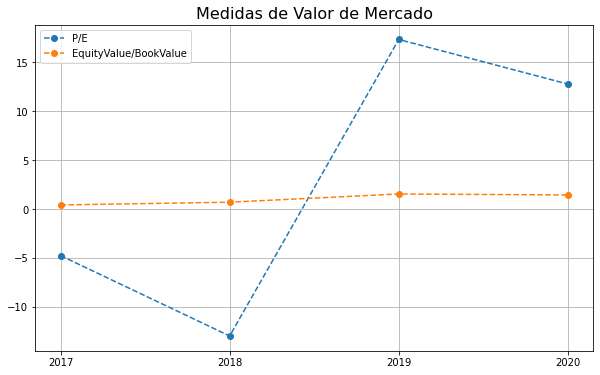

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(years, precoLucro, 'o--', label="P/E")
plt.plot(years, mercadoContabil, 'o--', label="EquityValue/BookValue")
plt.xticks(years)
plt.grid(True)
plt.title("Medidas de Valor de Mercado", size=16)
plt.legend()
plt.show()

## Função para juntar todos os DataFrames de Indicadores em um só

In [15]:
def mergeAllMetrics(dfs):
    output = pd.DataFrame(columns=["Ano", 2017, 2018, 2019, 2020])
    output.set_index("Ano", inplace=True)
    for df in dfs:
        output = output.append(df.T)
    return output

## Gerando o arquivo Excel de saída

In [16]:
dfs = [solvenciaCP, solvenciaLP, gestaoAtivos, lucratividade, mercado]
metrics = mergeAllMetrics(dfs)
writer = pd.ExcelWriter("Planilhas/Direcional/Indicadores-Direcional.xlsx", engine="openpyxl")
metrics.to_excel(writer, sheet_name="Indicadores")
writer.save()
writer.close()

In [17]:
metrics_horizontal = pd.DataFrame()

metrics_horizontal[2017] = (metrics[2017] / metrics[2017] * 100).round(2)
metrics_horizontal[2018] = (metrics[2018] / metrics[2017] * 100).round(2)
metrics_horizontal[2019] = (metrics[2019] / metrics[2017] * 100).round(2)
metrics_horizontal[2020] = (metrics[2020] / metrics[2017] * 100).round(2)

metrics_horizontal.to_excel(writer, sheet_name="Analise Horizontal")
writer.save()
writer.close()

## DuPont

$ROE = Margem \; Líquida \; \cdot \; Giro \; do \; Ativo \; \cdot Multiplicador \; do \; PL$

In [18]:
duPont = pd.DataFrame()

duPont["Ano"] = years
duPont["Margem Líquida"] = margemLiquida
duPont["Giro do Ativo"] = giroAtivoTotal
duPont["Multiplicador do PL"] = multPatrimonioLiq
duPont["ROE"] = ROE # Lucro Líquido / PL
duPont["ROE DuPont"] = duPont["Margem Líquida"] * duPont["Giro do Ativo"] * duPont["Multiplicador do PL"]

duPont.set_index("Ano", inplace=True)
duPont.round(4)

,Margem Líquida,Giro do Ativo,Multiplicador do PL,ROE,ROE DuPont
Ano,,,,,
2017,-0.1828,0.1815,2.5816,-0.0857,-0.0857
2018,-0.0634,0.2507,3.3387,-0.0531,-0.0531
2019,0.0829,0.3133,3.3992,0.0882,0.0882
2020,0.1000,0.2942,3.8070,0.1120,0.1120


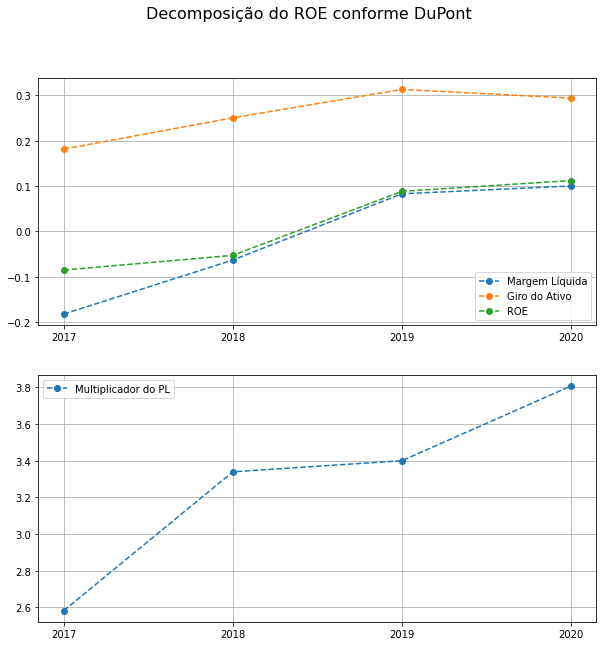

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax1.plot(years, margemLiquida, 'o--', label="Margem Líquida")
ax1.plot(years, giroAtivoTotal, 'o--', label="Giro do Ativo")
ax1.plot(years, ROE, 'o--', label="ROE")
ax1.set_xticks(years)
ax1.grid(True)
ax1.legend()
ax2.plot(years, multPatrimonioLiq, 'o--', label="Multiplicador do PL")
ax2.set_xticks(years)
ax2.grid(True)
ax2.legend()
fig.suptitle('Decomposição do ROE conforme DuPont', size=16)
plt.show()


In [20]:
mergeAllMetrics([duPont.round(4)]).to_excel(writer, sheet_name="Analise DuPont")
writer.save()
writer.close()

## Fluxo de Caixa

# Precisa conferir as contas, não estão batendo

### Fluxo de Caixa Operacional

$FCO = EBIT \; + \; Depreciação \; – \; Impostos \; Correntes$

### Fluxo de Caixa dos Ativos

$FC(A) = FCO \; - \; Gastos \; de \; Capital \; - \;  Variação \; do \; CCL$

In [21]:
years = [2019, 2020]

FCA = []
FCO = []
CAPEX = []
varCCL = []

for i in years: 
    EBIT = getValue(DRE, '(=) LAJIR', i)
    depre = getValue(DFC, 'Depreciação, Amortização e Exaustão', i)
    impostos = getValue(DRE, '(-) IR e CSLL', i)
    
    FCO_ = EBIT + depre - impostos
    
    CAPEX_ = getValue(DFC, 'Compra Ativo Imobilizado e Intangível', i) # no excel o valor está negativo, pois é uma saída de caixa para a empresa
    
    atualCCL = getValue(BP, 'Ativo Circulante', i) - (getValue(BP, 'Passivo Circulante', i) - getValue(BP, 'Financiamento CP', i) - getValue(BP, 'Debêntures CP', i))
    anteriorCCL = getValue(BP, 'Ativo Circulante', i - 1) - (getValue(BP, 'Passivo Circulante', i - 1) - getValue(BP, 'Financiamento CP', i - 1) - getValue(BP, 'Debêntures CP', i - 1))
    varCCL_ = atualCCL - anteriorCCL

    FCA_ = FCO_ - CAPEX_ - varCCL_
    
    FCA.append(FCA_)
    FCO.append(FCO_)
    CAPEX.append(CAPEX_)
    varCCL.append(varCCL_)
    
FCA_DF = pd.DataFrame()

FCA_DF["Ano"] = years
FCA_DF["FCO"] = FCO 
FCA_DF["CAPEX"] = CAPEX
FCA_DF["Var. CCL"] = varCCL 
FCA_DF["FC(A)"] = FCA 

FCA_DF.set_index("Ano", inplace=True)
FCA_DF

,FCO,CAPEX,Var. CCL,FC(A)
Ano,,,,
2019,195903.0,-21052,102221,114734.0
2020,231698.0,-22319,285305,-31288.0


### Fluxo de Caixa dos Credores

$FC(B) = Despesas \; Financeiras \; - \; Mudança \; de \; Dívida \; CP \; e \; LP$

In [22]:
FCB = []

for i in years:
    juros = getValue(DRE, '(-) Despesas Financeiras', i)
    
    dividaTotalAtual = getValue(BP, 'Financiamento CP', i) + getValue(BP, 'Financiamento LP', i) + getValue(BP, 'Debêntures CP', i) + getValue(BP, 'Debêntures LP', i)
    dividaTotalAnterior = getValue(BP, 'Financiamento CP', i - 1) + getValue(BP, 'Financiamento LP', i - 1) + getValue(BP, 'Debêntures CP', i - 1) + getValue(BP, 'Debêntures LP', i - 1)
    mudancaDivida = dividaTotalAtual - dividaTotalAnterior

    FCB_ = juros - mudancaDivida
    
    FCB.append(FCB_)

### Fluxo de Caixa dos Acionistas

$FC(S) = Dividendos \; + \; Recompra \; de \; Ações \; - \; Novas \; Emissões \; de \; Ações$

$FC(S) = Lucro \; Líquido \; - \; Variação \; PL$

In [23]:
FCS = []

for i in years:
    varResLucros = getValue(BP, 'Reserva de Lucros', i) - getValue(BP, 'Reserva de Lucros', i - 1) 
    varResCap = getValue(BP, 'Reservas de Capital', i) - getValue(BP, 'Reservas de Capital', i - 1)
    varPL = varResCap + varResLucros
    
    FCS_ =  getValue(DRE, '(=) Lucro Líquido', i) - varPL
    
    FCS.append(FCS_)

In [24]:
fluxoCaixa = pd.DataFrame()

fluxoCaixa["Ano"] = years
fluxoCaixa["FC(A)"] = FCA
fluxoCaixa["FC(B)"] = FCB
fluxoCaixa["FC(S)"] = FCS
fluxoCaixa["Check"] = fluxoCaixa["FC(A)"] == (fluxoCaixa["FC(B)"] + fluxoCaixa["FC(S)"])

fluxoCaixa.set_index("Ano", inplace=True)
fluxoCaixa

,FC(A),FC(B),FC(S),Check
Ano,,,,
2019,114734.0,83650.0,146522.0,False
2020,-31288.0,-241849.0,180404.0,False
